In [35]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [38]:
# Reading non-symmetric input data
df = pd.read_csv('SA_AAL_rg.csv')
df.head()

,Unnamed: 0,PreCG.AF8.L.AF8.SA,SFGdor.AF8.L.AF8.SA,ORBsup.AF8.L.AF8.SA,MFG.AF8.L.AF8.SA,ORBmid.AF8.L.AF8.SA,IFGoperc.AF8.L.AF8.SA,IFGtriang.AF8.L.AF8.SA,ORBinf.AF8.L.AF8.SA,ROL.AF8.L.AF8.SA,...,SMG.AF8.R.AF8.SA,ANG.AF8.R.AF8.SA,PCUN.AF8.R.AF8.SA,PCL.AF8.R.AF8.SA,HES.AF8.R.AF8.SA,STG.AF8.R.AF8.SA,TPOsup.AF8.R.AF8.SA,MTG.AF8.R.AF8.SA,TPOmid.AF8.R.AF8.SA,ITG.AF8.R.AF8.SA
0,PreCG.AF8.L.AF8.SA,1.000000,0.781541,0.599987,0.907600,0.759068,0.890024,0.511923,0.712339,0.682941,...,0.463328,0.466748,0.558368,0.661737,1.0,0.616721,0.692335,0.703851,1.000000,0.698570
1,SFGdor.AF8.L.AF8.SA,0.784238,1.000000,0.654876,0.889251,0.984121,0.894396,0.481911,0.581138,0.630645,...,0.208085,0.485249,0.610696,0.802549,1.0,0.660234,0.583257,0.668746,1.000000,0.534557
2,ORBsup.AF8.L.AF8.SA,0.629777,0.687242,1.000000,0.810324,0.999996,0.999981,0.621117,0.891096,0.850146,...,0.500591,0.576539,0.880757,0.849701,1.0,0.999999,0.687351,0.660425,1.000000,0.867181
3,MFG.AF8.L.AF8.SA,0.890097,0.895069,0.799320,1.000000,0.709482,0.863991,0.783207,0.999548,0.600411,...,0.721157,0.503557,0.646183,0.847648,1.0,0.593679,0.739358,0.720155,0.999984,0.705786
4,ORBmid.AF8.L.AF8.SA,0.832424,0.999978,1.000000,0.716031,1.000000,0.970398,0.000000,1.000000,0.860315,...,0.472784,0.987902,0.978636,0.998612,1.0,0.921856,0.746108,0.690314,0.999974,0.999850


In [39]:
df = df.drop(df.columns[0], axis = 'columns')
df.columns = df.columns.str.replace('.AF8.', '_')
df.head()

# DATA PREPROCESSING from before (not necessary anymore!)
# for i in range(78):
#     for j in range(78):
#         if df.iloc[i,j] < 0:
#             df.iloc[i,j] = 0
#         if df.iloc[i,j] > 1:
#             df.iloc[i,j] = 1
        # Thresholding
        #if df.iloc[i,j] < 0.5:
         #   df.iloc[i,j] = 0
# for column in df:
#      if df[column].dtype == np.object_:
#          df[column] = df[column].str.replace('.AC0.', '_').astype(float)
# df = df.fillna(1)
# df.head()

# INVERTING THE DATA (not necessary)
    # looking at dissim instead of sim
    # same as agglomerating vs. separating data
# for i in range(78):
#     for j in range(78):
#         a = df.iloc[i,j]
#         df.iloc[i,j] = 1-a

,PreCG_L_SA,SFGdor_L_SA,ORBsup_L_SA,MFG_L_SA,ORBmid_L_SA,IFGoperc_L_SA,IFGtriang_L_SA,ORBinf_L_SA,ROL_L_SA,SMA_L_SA,...,SMG_R_SA,ANG_R_SA,PCUN_R_SA,PCL_R_SA,HES_R_SA,STG_R_SA,TPOsup_R_SA,MTG_R_SA,TPOmid_R_SA,ITG_R_SA
0,1.000000,0.781541,0.599987,0.907600,0.759068,0.890024,0.511923,0.712339,0.682941,0.708343,...,0.463328,0.466748,0.558368,0.661737,1.0,0.616721,0.692335,0.703851,1.000000,0.698570
1,0.784238,1.000000,0.654876,0.889251,0.984121,0.894396,0.481911,0.581138,0.630645,0.885451,...,0.208085,0.485249,0.610696,0.802549,1.0,0.660234,0.583257,0.668746,1.000000,0.534557
2,0.629777,0.687242,1.000000,0.810324,0.999996,0.999981,0.621117,0.891096,0.850146,0.776977,...,0.500591,0.576539,0.880757,0.849701,1.0,0.999999,0.687351,0.660425,1.000000,0.867181
3,0.890097,0.895069,0.799320,1.000000,0.709482,0.863991,0.783207,0.999548,0.600411,0.910495,...,0.721157,0.503557,0.646183,0.847648,1.0,0.593679,0.739358,0.720155,0.999984,0.705786
4,0.832424,0.999978,1.000000,0.716031,1.000000,0.970398,0.000000,1.000000,0.860315,0.999001,...,0.472784,0.987902,0.978636,0.998612,1.0,0.921856,0.746108,0.690314,0.999974,0.999850


In [40]:
# Making dataset symmetric

for i in range(78):
    for j in range(i+1):
        a = float(df.iloc[i,j])
        b = float(df.iloc[j,i])
        c = (a+b)/2
        df.iloc[j,i] = c
        df.iloc[i,j] = c
df.head()

,PreCG_L_SA,SFGdor_L_SA,ORBsup_L_SA,MFG_L_SA,ORBmid_L_SA,IFGoperc_L_SA,IFGtriang_L_SA,ORBinf_L_SA,ROL_L_SA,SMA_L_SA,...,SMG_R_SA,ANG_R_SA,PCUN_R_SA,PCL_R_SA,HES_R_SA,STG_R_SA,TPOsup_R_SA,MTG_R_SA,TPOmid_R_SA,ITG_R_SA
0,1.000000,0.782889,0.614882,0.898848,0.795746,0.911589,0.529978,0.720192,0.677921,0.729642,...,0.485845,0.479285,0.564748,0.676950,0.999977,0.605582,0.690006,0.709810,1.000000,0.701649
1,0.782889,1.000000,0.671059,0.892160,0.992050,0.901731,0.505229,0.603169,0.596836,0.874533,...,0.229922,0.503912,0.619888,0.815601,0.999896,0.649726,0.579464,0.677813,0.999958,0.542124
2,0.614882,0.671059,1.000000,0.804822,0.999998,0.995554,0.621803,0.892710,0.836817,0.777931,...,0.501661,0.581307,0.863266,0.827970,1.000000,0.999985,0.665219,0.656369,0.999997,0.842190
3,0.898848,0.892160,0.804822,1.000000,0.712757,0.868303,0.888284,0.996981,0.600157,0.913580,...,0.755667,0.515194,0.653488,0.838001,0.999873,0.595624,0.735564,0.725573,0.999990,0.712420
4,0.795746,0.992050,0.999998,0.712757,1.000000,0.965452,0.000000,1.000000,0.778818,0.999498,...,0.478161,0.895656,0.875223,0.970061,1.000000,0.547695,0.726194,0.690705,0.991034,0.999923


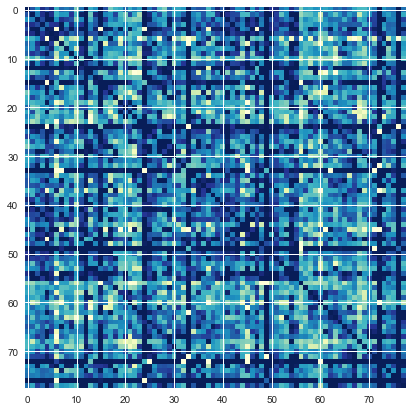

In [41]:
# Heatmap of the data

fig= plt.figure(figsize=(7,7))
plt.imshow(df, cmap='YlGnBu', interpolation='nearest')
plt.show()

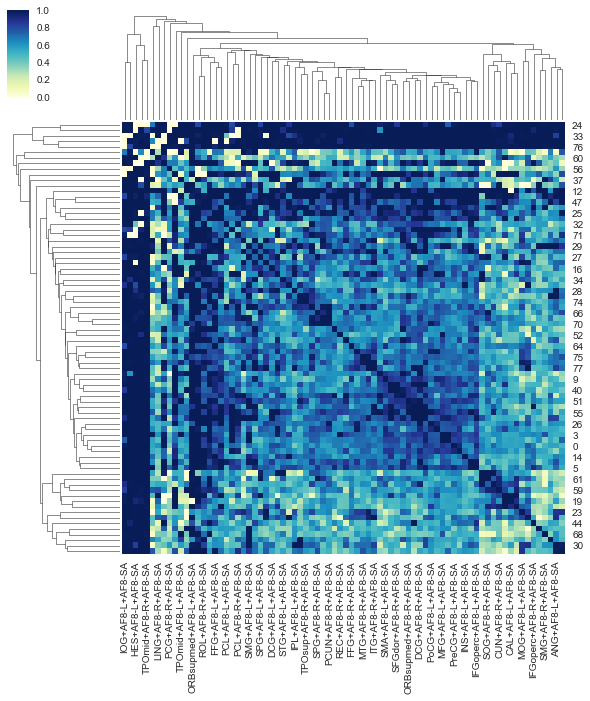

In [8]:
# Clustering: 

import seaborn as sns; sns.set(color_codes=True) # default is Euclidian
g = sns.clustermap(df, method='average',cmap='YlGnBu') # try single, ward, complete method as well

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

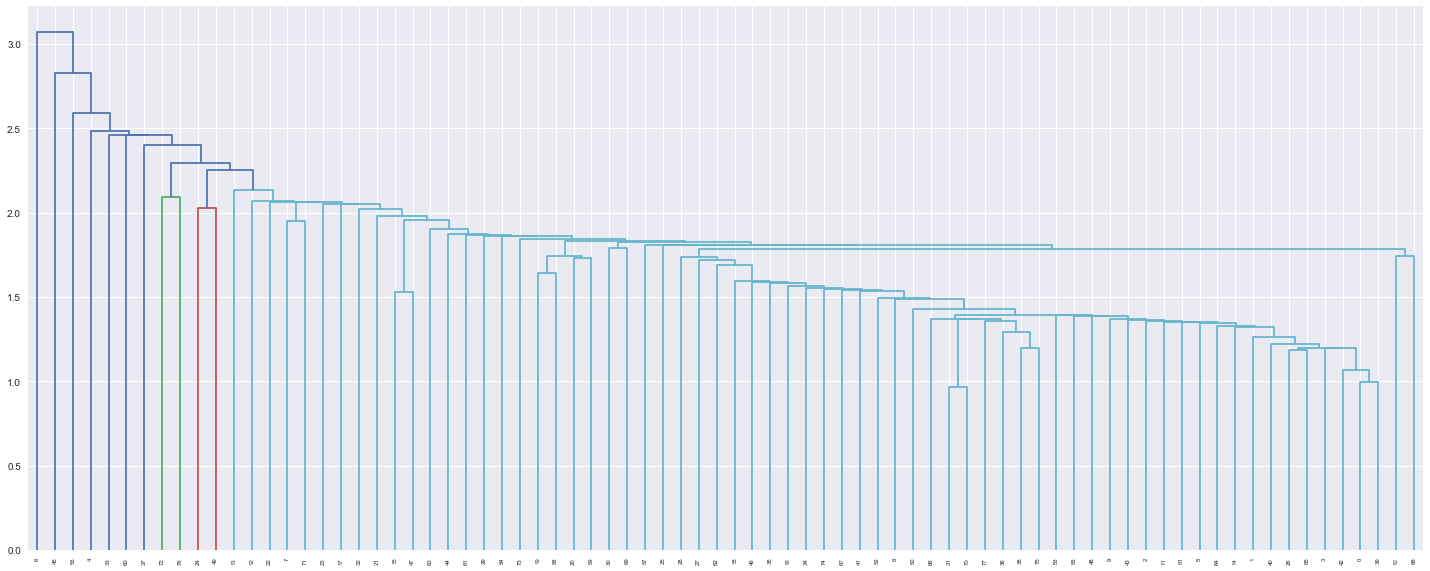

In [14]:
a = linkage(df,'single')
fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(a,truncate_mode='lastp')
dn = dendrogram(a)
plt.show()

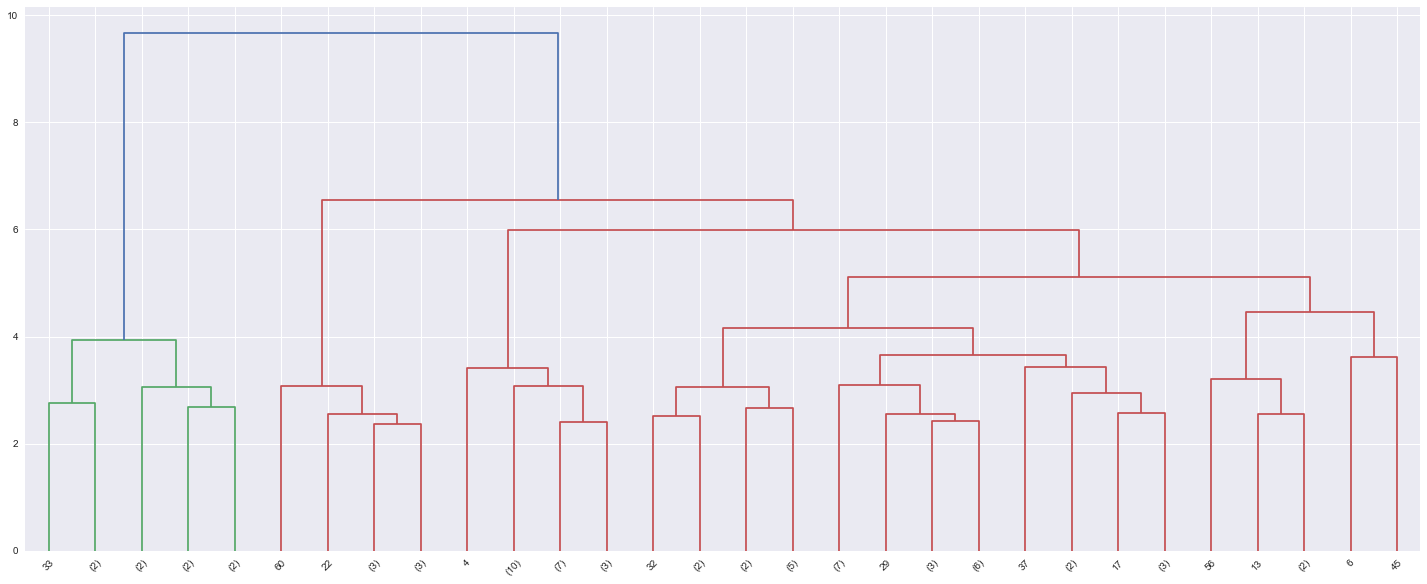

In [16]:
a = linkage(df,'ward')
fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(a)
dn = dendrogram(a,truncate_mode='lastp')
plt.show()